#  Module 4: IO and NumPy Arrays
## Chapters 6 and 7 from the Alex DeCaria textbook: 

Chapter 6: opening and closing files properly is important, but the approaches given in the text are less useful than the ways to open/close files to/from numpy arrays (and later pandas) that we will use

The Numpy module, which is readily installed with Python distributions, is designed to work with large data sets, particularly those with multiple dimensions. However, unlike Python lists and tuples, each NumPy array can hold only one data type. For example, a defined numpy array must be all floating numbers, strings, integers, etc....  Despite this syntax rule, it is much more computationally efficient to work with NumPy arrays than with lists/tuples. In this module, we will focus on:
- Reading data into numpy arrays
- Create arrays from scratch
- Review common NumPy data types
- Go over useful array functions
- Discuss array indexing and subsetting
- Learn how to reshape arrays
- Combine logical operators with arrays

**Note:** There are *ALOT* of things you can do with NumPy arrays, so for the purpose of time, we will not be abe to go over every function/trick related to NumPy arrays. *It will be up to you* to read the DeCaria book and review other online resources! This module is meant to give you the tools so that you can work with basic NumPy arrays.

**Before starting:** Make sure that you open up a Jupyter notebook session using OnDemand so you can interactively follow along with this week's sessions! Also, be copy this script in yso you have the original plus the ones we will go through during class.

<br><br>


# Revisiting opening numpy arrays in Chapter1.ipynb notebook

Run the chapter1.ipynb notebook that is duplicated from the chapter1 subdirectory in this module_4 

In [1]:
# import numpy
import numpy as np

Here is the description of the data file used in chapter 1.

Alta snowfall https://utahavalanchecenter.org/alta-monthly-snowfall

Look in the data folder to see the file alta_snow.csv created from that resource.

Open the alta_snow.csv file see the column contents and the units.

The 0th column is the Year at Season End
The 1st-6th column are the total snowfall in each month from November to April (in inches)
The 7th column is the Nov-Apr total snowfall (inches)
Begins in the 1946 season and ends in 2022

In [2]:
#use the numpy genfromtxt function to read the csv data

#notes: 
#access the file in the data subdirectory using the path relative format
#read the header line of the Alta snowfall data
#specify the delimiter in the data file

#first get the header row that are string values
headers = np.genfromtxt('../data/alta_snow.csv', delimiter=',', max_rows=1,dtype=(str))
print(headers)

#read the year column for the Alta snowfall data
#have to skip over the first row
year = np.genfromtxt('../data/alta_snow.csv', delimiter=',', usecols=0, skip_header=1)
print(year)

#read the seasonal totals from the 8th column and convert from inches to cm
snow = 2.54  * np.genfromtxt('../data/alta_snow.csv', delimiter=',', usecols=7, skip_header=1)
#print out the data after converting it to cm
print(snow)

#what are the min and max values?
#note the simpler way to format printing than shown in Chapter 3
print("Min: %.1f Max: %.1f" % (np.min(snow),np.max(snow)))

#note that the numpy arrays "look" like lists, but they are not they are np.ndarrays
print(type(snow))

['Ending Year' 'NOV' 'DEC' 'JAN' 'FEB' 'MAR' 'APR' 'TOTAL']
[1946. 1947. 1948. 1949. 1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957.
 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969.
 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981.
 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993.
 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005.
 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017.
 2018. 2019. 2020. 2021. 2022.]
[1145.54   949.96  1394.46  1328.42  1211.58   886.46  1628.14  1043.94
  972.82  1198.88  1168.4    980.44  1421.13   980.44  1004.57   828.04
 1019.81  1018.54  1437.64  1455.42  1099.82  1381.76  1217.93  1437.894
 1165.86  1223.01  1185.164 1261.11  1512.824 1536.7   1116.33   798.83
 1332.23  1493.52  1305.56   993.14  1767.84  1617.98  1888.49  1160.78
 1521.46   969.772 1042.162 1477.01  1137.92  1473.708 1003.3   1652.016
 1245.362 1893.316 1427.48  1521.714

# Chapter 6.8 Internet File Access
Now let's get the Alta snow file directly from the web.

We want to avoid the web html as much as possible from
Alta snowfall https://utahavalanchecenter.org/alta-monthly-snowfall

So, if you select the data table and after we change from output=html to output=csv

Then here is a link to grab the data table in csv format
https://docs.google.com/spreadsheets/d/1VoKi4OY-pj33uvyTZdQFclQ7rUshF-7wOyFOWvQ27dA/pub?output=csv

Let's then grab that file

In [3]:
#access a function from the urllib module
from urllib.request import urlretrieve
#also let's use a linux command to see the file size
import os
#and lets exit the program if we can't access the file for some reason
import sys


#define where the file is on the web
url = "https://docs.google.com/spreadsheets/d/1VoKi4OY-pj33uvyTZdQFclQ7rUshF-7wOyFOWvQ27dA/pub?output=csv"
# define the file to write the data into
filename = "alta_monthly_snow_from_url.csv"
#let's try if we can get the file from the web
try:
    #get the file over the web
    urlretrieve(url, filename)
    print("Saved", filename, os.path.getsize(filename)/1000., 'KB')
except:
    print("something wrong grabbing the file")
    print("but the program continues, so may be in error")

Saved alta_monthly_snow_from_url.csv 3.649 KB


In [4]:
#do you have the file in your module_4 directory?
# look at it- the file is more complicated with different columns and content at the bottom, etc.
# note first year has missing values (--) so, we skip over 1945
#we have to change the file read in order to have this work
#experiment with this
#read the headers
headers = np.genfromtxt(filename, delimiter=',', max_rows=1,dtype=(str),skip_header=3)
print(headers,"\n")

#read the year of the Alta snowfall data
year = np.genfromtxt(filename, delimiter=',',usecols=1,skip_header = 6,skip_footer=5)
print(year,'\n')
#read the seasonal total and convert from inches to cm
snow_new =  2.54 * np.genfromtxt(filename, delimiter=',', usecols=8, skip_header=6,skip_footer=5)
#print out the data after converting it to cm
print(snow_new)
print("Min: %.1f Max: %.1f" % (np.min(snow_new),np.max(snow_new)))

['Season' 'Year ending' 'Nov.' 'Dec.' 'Jan.' 'Feb.' 'Mar.' 'Apr.' 'Total'] 

[1946. 1947. 1948. 1949. 1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957.
 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969.
 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981.
 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993.
 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005.
 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017.
 2018. 2019. 2020. 2021. 2022.] 

[1145.54   949.96  1394.46  1328.42  1211.58   886.46  1628.14  1043.94
  972.82  1198.88  1168.4    980.44  1421.13   980.44  1004.57   828.04
 1019.81  1018.54  1437.64  1455.42  1099.82  1381.76  1217.93  1437.894
 1165.86  1223.01  1185.164 1261.11  1512.824 1536.7   1116.33   798.83
 1332.23  1239.52  1305.56   993.14  1767.84  1617.98  1888.49  1160.78
 1521.46   969.772 1042.162 1477.01  1137.92  1473.708 1003.3   1652.016
 1245.362 1893.31

In [5]:
# check that reading from the web is the same as that from the file previously downloaded
diff_snow = snow - snow_new
print(np.min(diff_snow),np.max(diff_snow))
#hmmn why the difference?
#use a numpy function "where" that will be discussed later
indices= np.where(diff_snow > 0)
print(type(indices))
print(indices)
#what years are those and what are the values?
print(year[indices],snow[indices],snow_new[indices])
#Are the differences important? Which do you trust?

0.0 254.0
<class 'tuple'>
(array([33, 75]),)
[1979. 2021.] [1493.52  949.96] [1239.52   949.452]


# Creating an array

There are many ways to create an array from scratch using NumPy. A simple way  is use NumPy's array function and give it a list/tuple as its input. Before starting, you must load the NumPy module (we did above, so really no need to do so here)

In [6]:
#import numpy as np

then, we can create a 1D array by doing the following:

In [7]:
a = np.array([1,5,3,-6,-2,4,-9,2,2])

The array that we created will be all integers, since we only supplied it with integer values. 

In [8]:
type(a)

numpy.ndarray

In [9]:
type(a[0])

numpy.int64

However, we can also create an array and predefine the data type using the `dtype` agrument:

In [10]:
a = np.array([1,5,3,-6,-2,4,-9,2,2],dtype=np.float64)
print(type(a[0]))

<class 'numpy.float64'>


Here, you can see that the first element in array a is now a floating number.

<br>
Listed below are the data types most commonly used within NumPy arrays:

>- `np.float`: Double percision (64 bit) floating point
>- `np.int64`: Double percision (64 bit) integer
>- `np.complex128`: Complex number, with a real and imaginary part that are each 64 bits
>- `np.bool_`: Boolean (True/False) data type. Note the underscore `_`. 

<br>

You can also create 2-D arrays (or other multidimensional arrays) by inserting nested lists/tuples as the input for `np.array` function...


In [11]:
a = np.array([[2,5],[1,-4]])
print(a)

[[ 2  5]
 [ 1 -4]]


In [12]:
#what is the shape and size of a?
#shape function returns array dimensions
print(np.shape(a),'\n')
#size function returns total number of elements in array
print(np.size(a),'\n')

(2, 2) 

4 



Finally, you can also create arrays using single values:

In [13]:
a_zero = np.zeros((10,10))
print(a_zero)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


or

In [14]:
#fill array elements with the same value, can be np.NaN too
a_pi = np.empty((10,10))
print(a_pi)
a_pi[:] = np.pi 
print(a_pi)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[3.14159265 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265
  3.14159265 3.14159265 3.14159265 3.14159265]
 [3.14159265 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265
  3.14159265 3.14159265 3.14159265 3.14159265]
 [3.14159265 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265
  3.14159265 3.14159265 3.14159265 3.14159265]
 [3.14159265 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265
  3.14159265 3.14159265 3.14159265 3.14159265]
 [3.14159265 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265
  3.14159265 3.14159265 3.14159265 3.14159265]
 [3.14159265 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265
  3.14159265 3.14159265 3.

The above is useful in order to know if you incorrectly fill in an array later on...

In [15]:
#printing numpy arrays neatly
z = np.array([0.0001,1000.999,np.pi*100])
#reset the print option to the default
np.set_printoptions(suppress=False,precision=8)
print(z)
# add the following to decrease precision and turn off scientific notation
np.set_printoptions(precision=2,suppress=True)
print(z,'\n')

#what about for the a_pi array?
print(a_pi)

[1.00000000e-04 1.00099900e+03 3.14159265e+02]
[   0.   1001.    314.16] 

[[3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14]
 [3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14]
 [3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14]
 [3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14]
 [3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14]
 [3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14]
 [3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14]
 [3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14]
 [3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14]
 [3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14]]


<br>

# Sequential arrays

There are 3 functions that are primarily used to generate sequential arrays in Python. These functions are `arange()`, `linspace()`, and `logspace()`. The `arange()` function behaves very similarly to the `range()` function in Python:


In [16]:
seq_array = np.arange(0,11,2)
print(seq_array)

[ 0  2  4  6  8 10]


In [17]:
seq_array = np.arange(11,0,-2)
print(seq_array)

[11  9  7  5  3  1]


And you get the idea... The data type of the array is determined by the input. So if all the inputs are integers, it will be an integer-type data array. Note that you can define the dtype argument when using the `np.arange` function.


<br>

The `linspace()` function allows the user to specify a begining and end value and the number of points to create:


In [18]:
seq_array = np.linspace(1,10,30)
print(seq_array)
len(seq_array)

[ 1.    1.31  1.62  1.93  2.24  2.55  2.86  3.17  3.48  3.79  4.1   4.41
  4.72  5.03  5.34  5.66  5.97  6.28  6.59  6.9   7.21  7.52  7.83  8.14
  8.45  8.76  9.07  9.38  9.69 10.  ]


30

In [19]:
#note that if you want to have values at even fractions say 0.25, you need to adjust a bit
#if from 0 to 10 at 0.25 there would be 4*10+1 values to include the first and last values

In [20]:
seq_array = np.linspace(0,10,41)
print(seq_array)
len(seq_array)

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.  ]


41

In [21]:
#these sequential arrays are useful for looping
for t in seq_array:
    f = t * 1.8 + 32
    print(t,f)

0.0 32.0
0.25 32.45
0.5 32.9
0.75 33.35
1.0 33.8
1.25 34.25
1.5 34.7
1.75 35.15
2.0 35.6
2.25 36.05
2.5 36.5
2.75 36.95
3.0 37.4
3.25 37.85
3.5 38.3
3.75 38.75
4.0 39.2
4.25 39.65
4.5 40.1
4.75 40.55
5.0 41.0
5.25 41.45
5.5 41.9
5.75 42.35
6.0 42.8
6.25 43.25
6.5 43.7
6.75 44.15
7.0 44.6
7.25 45.05
7.5 45.5
7.75 45.95
8.0 46.4
8.25 46.85
8.5 47.3
8.75 47.75
9.0 48.2
9.25 48.650000000000006
9.5 49.1
9.75 49.55
10.0 50.0


In [22]:
#but there is a simpler way. just compute using the array (this is broadcasting or implicit looping)
f = seq_array * 1.8 + 32
print(seq_array,'\n',f)

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.  ] 
 [32.   32.45 32.9  33.35 33.8  34.25 34.7  35.15 35.6  36.05 36.5  36.95
 37.4  37.85 38.3  38.75 39.2  39.65 40.1  40.55 41.   41.45 41.9  42.35
 42.8  43.25 43.7  44.15 44.6  45.05 45.5  45.95 46.4  46.85 47.3  47.75
 48.2  48.65 49.1  49.55 50.  ]


<br>

Finally, the `np.logspace()` function works similar to the `linspace()` function, but the values are spaced logarithmically. See the DeCaria text for more example on this!


<br>

# Indexing and subsetting arrays

Specific elements in an array can be accessed by indexing or subsetting Python NumPy arrays, similar to that of lists/tuples. For multidimensional arrays, the different dimensions are seperated by commas. The first index often refers to the row of the array, while the second index refers to the column. For 3 dimensional arrays, the 3rd index would represent the height, and so on...

⚠️ Note: *Technically*, subsetting an array and saving it to a variable does not create a new copy of it, essentially it is just a pointer to the original array. This ultimately saves memory for the computer, which can be important when working with large data sets. This does not change anything for the purposes of this class, more or less this is just good to know. This is referred to as a *shallow* copy. If you must copy an array, you can use the `np.copy()` function, but this is rarely needed. 

Here are some example on how to index arrays wich is similar to indexing tuples/lists. For most part this should be review... ;-)


In [23]:
seq_array = np.arange(0,11,2)
print(seq_array)

[ 0  2  4  6  8 10]


In [24]:
print(seq_array[3])

6


In [25]:
print(seq_array[3:])

[ 6  8 10]


In [26]:
print(seq_array[-1])

10


<br>

And some striding examples...

In [27]:
seq_array = np.arange(0,21,1) 
print(seq_array)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [28]:
print(seq_array[0:12:2])

[ 0  2  4  6  8 10]


In [29]:
print(seq_array[::-1])

[20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]


In [30]:
print(seq_array[::-2])

[20 18 16 14 12 10  8  6  4  2  0]


And you get the idea of striding...!

<br>

Finally, it is also possible to index with lists, which can be very useful:

In [31]:
my_list = [0,2,4,6,8,10]
print(seq_array[my_list])

[ 0  2  4  6  8 10]


This is useful, especially when utilizing the `where()` function as shown above and discussed more below

<br>
Where indexing becomes more of a challenge is when there are more than 1 dimensions..

Generally it is a good idea to not go crazy and use 3 or more dimensions unless you really have to. Keeping track and debugging becomes more of a challenge.

Indexing multidimensional arrays is very similar to that of 1-D arrays, except that there are 2 or more dimensions that you need to consider. For example, lets say I wanted to grab the first element of a 2D array (upper left corner or the '1'):


In [32]:
array_2D = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(array_2D)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [33]:
print(array_2D[0,0])

1


In [34]:
#remember- in a 2d array, the first index is row and the second index is column 

<br>

# Do it yourself #1

1) What if I want to grab the top middle index (the '2')?

2) What if I wanted to grab the left middle value of our array (the '4')?

3) What is I wanted to grab the entire middle row (4, 5, 6)?

4) What if I wanted to subset for the values 5, 6, 7, 8?




In [35]:
#1
print(array_2D[0,1])
#2
print(array_2D[1,0])
#3
print(array_2D[1,:])
#4
#this is more complicated
print(array_2D[1,1:],array_2D[2,0:2])
#another way is to flatten the array into a single dimension array
a_2D = array_2D.flatten()
print(a_2D)
print(a_2D[4:8])


2
4
[4 5 6]
[5 6] [7 8]
[1 2 3 4 5 6 7 8 9]
[5 6 7 8]


<br>

# Broadcasting arrays

After defining an array, we can use  *broadcasting* to perform mathematical expressions or other Python functions. You are telling Python to broadcast a command across all elemnts of the array. 

For those familiar with Matlab, broadcasting is described there as element multiplication, (e.g., the math operator .*,etc.).

Some examples of broadcasting:
    

In [36]:
print(array_2D)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [37]:
print(array_2D * 2)

[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]


 This works with other mathematical functions like addition, division, substraction, etc....

You can also broadcast to specific elements within an array as well...

In [38]:
print(array_2D[1:,1:] + 10)

[[15 16]
 [18 19]]


In [39]:
print(array_2D[:2,:2]**2)

[[ 1  4]
 [16 25]]


Arrays can also be added and subtracted together...

In [40]:
array1 = np.array([[1,2,3],[4,5,6],[7,8,9]])
array2 = np.array([[2,3,4],[5,6,7],[8,9,10]])
    
array3 = array1 + array2
    
print(array1,'\n',array2,'\n',array3)

[[1 2 3]
 [4 5 6]
 [7 8 9]] 
 [[ 2  3  4]
 [ 5  6  7]
 [ 8  9 10]] 
 [[ 3  5  7]
 [ 9 11 13]
 [15 17 19]]


In [41]:
# you need to be careful when attempting to broadcast when the dimensions are not the same
# example multiply each row by a unique value. values changing the same in each column

In [42]:
array4 = [[1,2,3,4],[5,6,7,8],[9,10,11,12]]
print(array4)
valc = np.array([0,1,2,3])
array_mult = valc * array4
print(np.shape(valc),np.shape(array4),np.shape(array_mult))
print(valc, '\n',array4)
print(array_mult)

#hint later in the program some variables are used 

[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
(4,) (3, 4) (3, 4)
[0 1 2 3] 
 [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
[[ 0  2  6 12]
 [ 0  6 14 24]
 [ 0 10 22 36]]


In [43]:
# you need to be careful when attempting to broadcast when the dimensions are not the same
# for most applications, you need to insure that either the number of rows or columns (or both) are the same
# example multiply each column by a unique value
# values changing similarly across each row

In [44]:
#broadcasting across rows
valr = np.array([[0],[1],[2]])
array_mult = valr * array4
print(np.shape(valr),np.shape(array4),np.shape(array_mult))
print(valr, '\n',array4)
print(array_mult)

(3, 1) (3, 4) (3, 4)
[[0]
 [1]
 [2]] 
 [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
[[ 0  0  0  0]
 [ 5  6  7  8]
 [18 20 22 24]]


<br>

# Explicit and implicit loops

For more complicated expressions, especially those that require multiple lines of code, we can use the `for` loop construct to go through elements in our array. Generally, this is less efficient, and so it should only be used when absolutely necessary.

⚠️ Note: If Python is your first programming language, you may find yourself using loops more often until you start mastering programming. However, for/while loops are a last resort rather than what you should do at first

Implicit looping (broadcasting) will become more natural if you just recognize you are applying some action to each element.  

Another example of an explicit loop:


In [45]:
x = np.linspace(0,4*np.pi,100) 
#create another array with exactly the same shape as x
y = np.zeros_like(x)

    #loop over all values
for i, val in enumerate(x):
    y[i] =  np.sin(val)
    print("x: %.2f  y: %.2f" % (x[i],y[i]))

x: 0.00  y: 0.00
x: 0.13  y: 0.13
x: 0.25  y: 0.25
x: 0.38  y: 0.37
x: 0.51  y: 0.49
x: 0.63  y: 0.59
x: 0.76  y: 0.69
x: 0.89  y: 0.78
x: 1.02  y: 0.85
x: 1.14  y: 0.91
x: 1.27  y: 0.95
x: 1.40  y: 0.98
x: 1.52  y: 1.00
x: 1.65  y: 1.00
x: 1.78  y: 0.98
x: 1.90  y: 0.95
x: 2.03  y: 0.90
x: 2.16  y: 0.83
x: 2.28  y: 0.76
x: 2.41  y: 0.67
x: 2.54  y: 0.57
x: 2.67  y: 0.46
x: 2.79  y: 0.34
x: 2.92  y: 0.22
x: 3.05  y: 0.10
x: 3.17  y: -0.03
x: 3.30  y: -0.16
x: 3.43  y: -0.28
x: 3.55  y: -0.40
x: 3.68  y: -0.51
x: 3.81  y: -0.62
x: 3.93  y: -0.71
x: 4.06  y: -0.80
x: 4.19  y: -0.87
x: 4.32  y: -0.92
x: 4.44  y: -0.96
x: 4.57  y: -0.99
x: 4.70  y: -1.00
x: 4.82  y: -0.99
x: 4.95  y: -0.97
x: 5.08  y: -0.93
x: 5.20  y: -0.88
x: 5.33  y: -0.81
x: 5.46  y: -0.73
x: 5.59  y: -0.64
x: 5.71  y: -0.54
x: 5.84  y: -0.43
x: 5.97  y: -0.31
x: 6.09  y: -0.19
x: 6.22  y: -0.06
x: 6.35  y: 0.06
x: 6.47  y: 0.19
x: 6.60  y: 0.31
x: 6.73  y: 0.43
x: 6.85  y: 0.54
x: 6.98  y: 0.64
x: 7.11  y: 0.73
x: 7.2

Of course we can also simplify the above code by doing the following...

In [46]:
y2 = np.sin(x)
print(y2)

[ 0.    0.13  0.25  0.37  0.49  0.59  0.69  0.78  0.85  0.91  0.95  0.98
  1.    1.    0.98  0.95  0.9   0.83  0.76  0.67  0.57  0.46  0.34  0.22
  0.1  -0.03 -0.16 -0.28 -0.4  -0.51 -0.62 -0.71 -0.8  -0.87 -0.92 -0.96
 -0.99 -1.   -0.99 -0.97 -0.93 -0.88 -0.81 -0.73 -0.64 -0.54 -0.43 -0.31
 -0.19 -0.06  0.06  0.19  0.31  0.43  0.54  0.64  0.73  0.81  0.88  0.93
  0.97  0.99  1.    0.99  0.96  0.92  0.87  0.8   0.71  0.62  0.51  0.4
  0.28  0.16  0.03 -0.1  -0.22 -0.34 -0.46 -0.57 -0.67 -0.76 -0.83 -0.9
 -0.95 -0.98 -1.   -1.   -0.98 -0.95 -0.91 -0.85 -0.78 -0.69 -0.59 -0.49
 -0.37 -0.25 -0.13 -0.  ]


Gives you the same result...

In [47]:
print(y2 - y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


<br>

# Other useful array-related commands

Listed below are useful functions and methods that I use when working with arrays!

>- `<var name>.sum()`: Computes the sum of an array
>- `<var name>.mean()`: Computes the mean of an array
>- `<var name>.std()`: Computes the standard deviation of an array
>- `<var name>.var()`: Computes the variance of an array
important note: numpy default std and var assume the degrees of freedom = 0 
which means they are "sample" std devs and variances. More on this later
(and this is good that it is the default!)
>- `shape()`: Returns the shape of an array
>- `size()`: Returns the number of elements in an array



<br>

# Reshaping, transposing, and shifting arrays

There are also a number of functions available for manipulating and changing the shape of an array, or for moving elements around within an array. 

>- `<var name>.flatten()`: Flattens a multidimensional array to a 1-D version
>- `reshape(a,ns)`: Returns a copy of an array (a) with new shape ns. ⚠️ The new shape must have the same number of elements!
>- `roll(a, shift,axis)`: Moves elements of a by the amount of shift. For multidimensional arrays, the arguments axis must be provided,, which specifies the axis to roll. For 1D arrays this can be left out.
>- `transpose(a)`: returns a transposed copy of a.
>- `rot90(a,n)`: returns a copy of 'a'  rotated clockwise by n x 90 degree. A negative 'n' will rotate 'a' counterclockwise
>- `squeeze(a)`: Returns a copy of 'a' with a single-element dimensions removed (i.e a 0 x 10 array will just be 10). 


Create some arrays and play around with some of these functions and methods!


<br>

**Appending:** Elements can also be appended to arrays. For example:


In [48]:
seq_array = np.arange(0,11,2)
print(seq_array)

[ 0  2  4  6  8 10]


In [49]:
seq_array = np.append(seq_array,[12,14])
print(seq_array)

[ 0  2  4  6  8 10 12 14]


<br>

**Inserting:** Elements can also be inserted into an array using the `np.insert()` function. This function has arguments 'a', which is our array we are inserting into, 'ind', which is the index of 'a' that we are inserting into. 'Elements' is the last argument, which will be the elements that we will be inserting into array 'a':

In [50]:
print(seq_array)

[ 0  2  4  6  8 10 12 14]


In [51]:
seq_array = np.insert(seq_array,2,[24,22,20])
print(seq_array)

[ 0  2 24 22 20  4  6  8 10 12 14]


<br>

**Deleting:** Elements can be deleted from an array. The `np.delete()` function, which has arguments 'a' and 'index', can remove elements from 'a' from the specified indices. 

In [52]:
seq_array = np.delete(seq_array,[2,3,4])
print(seq_array)

[ 0  2  4  6  8 10 12 14]


<br>

Elements within an array can also be reassigned following the syntax below:


In [53]:
seq_array = np.arange(0,11,2)
print(seq_array)

[ 0  2  4  6  8 10]


In [54]:
seq_array[3] = 99
print(seq_array)

[ 0  2  4 99  8 10]


In [55]:
seq_array[2:5] = [-999,-999,-999]
print(seq_array)

[   0    2 -999 -999 -999   10]


<br>

# Stacking and splitting arrays

NumPy arrays can also be combined to form a new, multidimensional array or they can be splitted into multiple 'subarrays'.

**Stacking:** Multiple arrays can be stacked horizontally (by column) or vertically (by row) to form a single array. This can be done using the `np.vstack()` or `np.hstack()` functions. An example of a `np.vstack` function can be seen below:


In [56]:
array1 = np.array([1,2,3])
array2 = np.array([4,5,6])
array3 = np.array([7,8,9])
    
print(array1)
print(' ')
print(array2)
print(' ')
print(array3)

[1 2 3]
 
[4 5 6]
 
[7 8 9]


In [57]:
array_2D = np.vstack((array1,array2,array3))
print(array_2D)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


<br>

**Splitting:**  Arrays can also be seperated into subarrays using the `np.split()`, `np.hsplit()`, & `np.vsplit()` functions. Each of these has arguments for the array we are splitting 'a' and the number of subarrays we want to split our main array into. A `np.vsplit()` example can be seen below:


In [58]:
arrays = np.vsplit(array_2D,3)
print(arrays)

[array([[1, 2, 3]]), array([[4, 5, 6]]), array([[7, 8, 9]])]


<br>

**Merging:** Finally, two 1-D arrays can be merged together to form a single, multidimensional array using the `np.meshgrid(array1,array2)` function that has arguments of array1 (first array) and array2 (second array):

This is super important for plotting. We will discuss this a great deal more later.


In [59]:
lon = np.linspace(-119,-110,10)
lat = np.linspace(41,50,10)
    
x2d, y2d = np.meshgrid(lon,lat)

What happens when we do this?

<br>


# Logical operations with arrays

The `np.where` function provides a way for the programmer to search through an array and determine which elements meet a certain criteria. This function then returns indices of our array where these conditions are met. For example, lets say we have a 3 x 3 array (2D):


In [60]:
array_2D = np.array([[3,2,0],[4,-4,-10],[-1,4,11]])

Using the `np.where` function, lets determine which indices have elements that are less than 0:

In [61]:
negative_indices = np.where(array_2D < 0)
print(negative_indices)

(array([1, 1, 2]), array([1, 2, 0]))


Did this work? Lets check!

In [62]:
print(array_2D[negative_indices])

[ -4 -10  -1]


<br>

We can also add multiple conditions using the where statement....


In [63]:
x = np.arange(-10,10,1)
idx = np.where((x > -5) & (x < 5))
print(x)


[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9]


Does this work?

In [64]:
print(x[idx])

[-4 -3 -2 -1  0  1  2  3  4]


<br><br>

# Do it yourself #2
    
1) Replace all negative numbers within the array below with a NaN

    array([0, -1.2, 2, -1, 4.9, -1, 6.1, -1, 8, -1])

<br>

2) Create a sequence of numbers between 0 and 20 that when divided by 4 have no remainder)


<br>

3) Create a 10 by 10 array that goes from 0 and ends at 99.

<br>

4) Compute the mean and std of our 10 by 10 array that we just created.

<br>

5) Check the data type of our newly created array.

<br>

6) What indices and values are greater than or equal to 40 but less than 50 in our 10 by 10 array?

7) what are the mean and std of the valyes computed in #6



In [65]:
#1
a = np.array([0, -1.2, 2, -1, 4.9, -1, 6.1, -1, 8, -1])
a_neg_ind = np.where(a<0)
print(np.shape(a_neg_ind))
a[a_neg_ind] = np.NaN
print(a)

(1, 5)
[0.  nan 2.  nan 4.9 nan 6.1 nan 8.  nan]


In [66]:
# 2
vals = np.arange(0,20)
val_4_index = np.where(np.mod(vals,4)==0)
print(vals[val_4_index])

[ 0  4  8 12 16]


In [67]:
#3
vals = np.arange(0,100)
print(vals)
a = np.reshape(vals,[10,10])
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


In [68]:
#4
a_mean = np.mean(a)
a_std = np.std(a)
print(a_mean,a_std)

49.5 28.86607004772212


In [69]:
#5
print(type(a))

<class 'numpy.ndarray'>


In [70]:
#6
a_40s_indices = np.where(((a>=40) & (a< 50)))
print(a_40s_indices,type(a_40s_indices))
a_40s_values = a[a_40s_indices]
print(a_40s_values)


(array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])) <class 'tuple'>
[40 41 42 43 44 45 46 47 48 49]


In [71]:
#7
av_mean = np.mean(a_40s_values)
av_std = np.std(a_40s_values)
print(av_mean,av_std)

44.5 2.8722813232690143


In [72]:
# for completeness, the code used to generate Figure 1.3 is repeated here since it relies on the n.random module
# the plot is shown but not written to a file

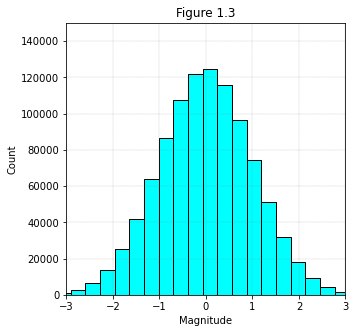

In [73]:
import matplotlib.pyplot as plt
#generate a Gaussian type empirical distribution for figure 1.3
from numpy.random import normal,uniform
sample = normal(loc=0, scale=1, size=1000000)
# plot the histogram
fig,(ax1) = plt.subplots(1,1,figsize=(5,5))
ax1.hist(sample, bins=31, color='cyan',edgecolor='black',linewidth=1,align='mid')
ax1.set(xlim=(-3,3),ylim=(0,150000))
ax1.set(xlabel="Magnitude",ylabel="Count")
ax1.set(title="Figure 1.3")
#add grids to the plot
ax1.grid(linestyle='--', color='grey', linewidth=.2)
plt.show()

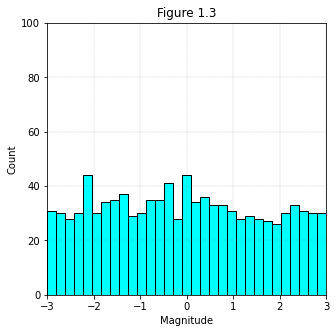

In [74]:
#lets do a uniform distribution
sample = uniform(-3.,3., size=1000)
# plot the histogram
fig,(ax1) = plt.subplots(1,1,figsize=(5,5))
ax1.hist(sample, bins=31, color='cyan',edgecolor='black',linewidth=1,align='mid')
ax1.set(xlim=(-3,3),ylim=(0,100))
ax1.set(xlabel="Magnitude",ylabel="Count")
ax1.set(title="Figure 1.3")
#add grids to the plot
ax1.grid(linestyle='--', color='grey', linewidth=.2)
plt.show()

# Do it yourself #3

This is a big question, so don't expect to do this quickly.

1) Start from alta_monthly_snow_from_url.csv file that you created above and extract the snow totals in cm in each January from 1946 to 2022 into the variable "JAN"

Print out the values

2) Create a variable year_2000s that contains the years from 2000 to 2022. Your code should include a way to determine the set of values from 2000 to 2020, not just by counting, etc. Hint- use the where function to find the index values and then use the indices to assign the values to years_2000s

Print out the index values and the values

3) Create a new variable JAN_2000s that contains only the January values from 2000 to 2022. You should be able to use info from #2

Print out the values

4) Copy the relevant code from the chapter.ipynb file to plot the time series for the years from 2000 to the present of January snow totals from Alta and create a file Alta_JAN_snow_2000s.png.

While we have discussed plotting in depth yet, the point here is to be able to look at existing code and make small modifications. Do it sequentially and you will likely not run into any errors you cannot resolve.

Be sure you import matplotlib (see chapter1 code)

Your name and unid should be in the title. 

Tick marks on the time axis should be every 5 years from 2000 to 2020. 

The range in values should be between 0 and 500 cm

5) Compute and print with appropriate precision the min,max,and median values of January snowfall at Alta during the 2000's


In [75]:
#read the Jan total and convert from inches to cm
JAN =  2.54 * np.genfromtxt(filename, delimiter=',', usecols=4, skip_header=6,skip_footer=5)
print(JAN)

[214.63 154.94 116.84 335.28 337.82 284.48 292.1  284.48 137.16 340.36
 261.62 218.44 212.09 205.74 149.86   2.54 218.44 215.9  274.32 381.
 185.42 426.72  99.06 287.02 262.89 147.32 240.03 163.83 265.43 264.16
 189.23 128.27 252.73 199.39 363.22 185.42 363.22 191.77 106.68 111.76
 142.24 243.84 266.95 179.71 273.05 210.31 106.17 419.86 311.66 507.24
 474.98 359.41 327.41 267.46 254.   168.15 256.29  66.04 188.72 288.29
 375.92  97.79 472.44 287.02 224.79 106.68 163.83 144.78 162.56  72.39
 246.38 391.16 130.81 215.9  297.18 126.49  54.1 ]


In [76]:
year_2000s_index = np.where(year>=2000)
year_2000s = year[year_2000s_index]
print(year_2000s)


[2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011.
 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019. 2020. 2021. 2022.]


In [77]:
JAN_2000s = JAN[year_2000s_index]
print(JAN_2000s)

[254.   168.15 256.29  66.04 188.72 288.29 375.92  97.79 472.44 287.02
 224.79 106.68 163.83 144.78 162.56  72.39 246.38 391.16 130.81 215.9
 297.18 126.49  54.1 ]


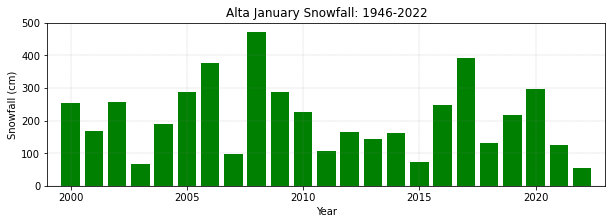

In [78]:
import matplotlib.pyplot as plt
#Create bar plot time series of Alta seasonal snowfall in the 2000s
#create a list for the times for tick marks on the x axis. This will stop at 2020 (not 2030)
year5_ticks = np.arange(2000,2025,5)

#create a fig of Alta snowfall time series
fig,(ax1) = plt.subplots(1,1,figsize=(10,3))
ax1.bar(year_2000s,JAN_2000s,color='green')
ax1.set(xlim=(1999,2023),ylim=(0,500))
ax1.set(xlabel="Year",ylabel="Snowfall (cm)")
ax1.set(xticks=year5_ticks)
ax1.set(title="Alta January Snowfall: 1946-2022")
#add grids to the plot
ax1.grid(linestyle='--', color='grey', linewidth=.2)

#save the figure to 
plt.savefig('alta_JAN_snowfall.png')

In [79]:
min_jan = np.min(JAN_2000s)
med_jan = np.median(JAN_2000s)
max_jan = np.max(JAN_2000s)
print(min_jan,med_jan,max_jan)

54.102000000000004 188.722 472.44


<br><br>

# Want more practice!?
Check out the following webpages:<br>  
https://www.tutorialspoint.com/numpy/index.htm<br>
https://www.w3schools.com/python/default.asp (left navigation bar)<br>
<br>
